In [10]:
from keras import layers, models

In [11]:
class AE(models.Model):
    def __init__(self, x_nodes, z_dim):
        x_shape = (x_nodes,)
        x = layers.Input(shape=x_shape)
        z = layers.Dense(z_dim, activation='relu')(x)
        y = layers.Dense(x_nodes, activation='sigmoid')(z)
        
        super().__init__(x, y)
        self.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

        self.x = x
        self.z = z
        self.z_dim = z_dim
    
    def Encoder(self):
        return models.Model(self.x, self.z)
    
    def Decoder(self):
        z_shape = (self.z_dim,)
        z = layers.Input(shape=z_shape)
        y_layer = self.layers[-1]
        y = y_layer(z)
        return models.Model(z, y)

In [12]:
from keras.datasets import mnist

(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

In [16]:
x_nodes = 784
z_dim = 5

autoencoder = AE(x_nodes, z_dim)

In [17]:
history = autoencoder.fit(X_train, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.4131 - accuracy: 0.7219 - val_loss: 0.2756 - val_accuracy: 0.7967
Epoch 2/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.2723 - accuracy: 0.7952 - val_loss: 0.2678 - val_accuracy: 0.7938
Epoch 3/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.2635 - accuracy: 0.7945 - val_loss: 0.2571 - val_accuracy: 0.7939
Epoch 4/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.2546 - accuracy: 0.7914 - val_loss: 0.2506 - val_accuracy: 0.7899
Epoch 5/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.2494 - accuracy: 0.7913 - val_loss: 0.2454 - val_accuracy: 0.7907
Epoch 6/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.2437 - accuracy: 0.7920 - val_loss: 0.2390 - val_accuracy: 0.7915
Epoch 7/100
60000/60000 [==============================] - 1s 

Epoch 56/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.1967 - accuracy: 0.7958 - val_loss: 0.1954 - val_accuracy: 0.7952
Epoch 57/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.1967 - accuracy: 0.7958 - val_loss: 0.1953 - val_accuracy: 0.7946
Epoch 58/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.1966 - accuracy: 0.7958 - val_loss: 0.1952 - val_accuracy: 0.7955
Epoch 59/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.1966 - accuracy: 0.7958 - val_loss: 0.1952 - val_accuracy: 0.7951
Epoch 60/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.1965 - accuracy: 0.7959 - val_loss: 0.1951 - val_accuracy: 0.7944
Epoch 61/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.1965 - accuracy: 0.7958 - val_loss: 0.1951 - val_accuracy: 0.7959
Epoch 62/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.1964 - accuracy: 0.7959

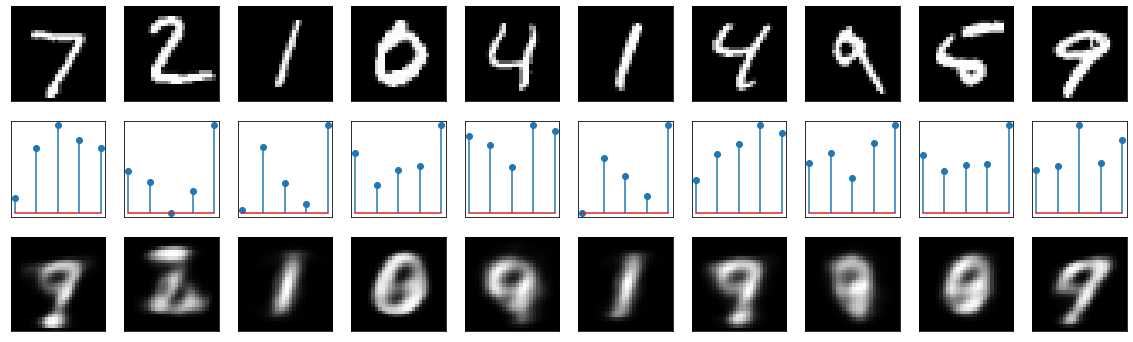

In [18]:
from keraspp.skeras import plot_loss, plot_acc
import matplotlib.pyplot as plt

encoder = autoencoder.Encoder()
decoder = autoencoder.Decoder()

encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20,6))

for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i + 1 + n)
    plt.stem(encoded_imgs[i].reshape(-1), use_line_collection=True)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

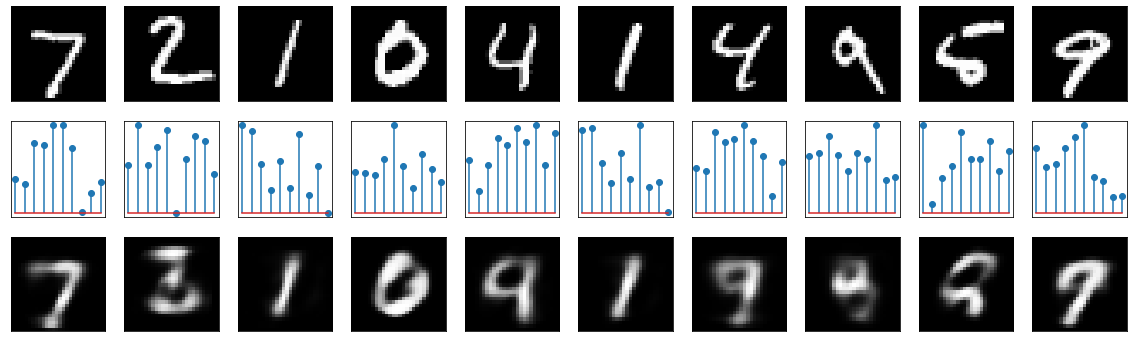

In [15]:
from keraspp.skeras import plot_loss, plot_acc
import matplotlib.pyplot as plt

encoder = autoencoder.Encoder()
decoder = autoencoder.Decoder()

encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20,6))

for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i + 1 + n)
    plt.stem(encoded_imgs[i].reshape(-1), use_line_collection=True)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

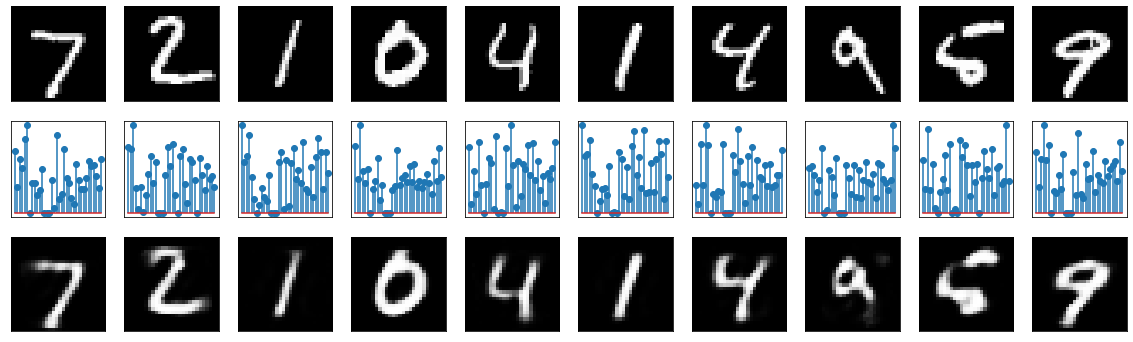

In [6]:
from keraspp.skeras import plot_loss, plot_acc
import matplotlib.pyplot as plt

encoder = autoencoder.Encoder()
decoder = autoencoder.Decoder()

encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20,6))

for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i + 1 + n)
    plt.stem(encoded_imgs[i].reshape(-1), use_line_collection=True)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

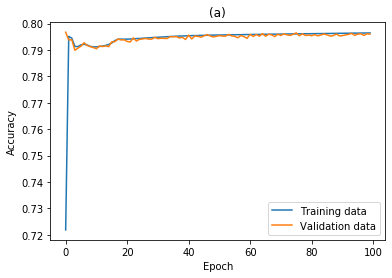

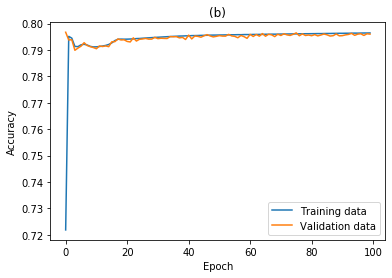

In [19]:
plot_acc(history,'(a)')
plt.show()
plot_acc(history,'(b)')
plt.show()


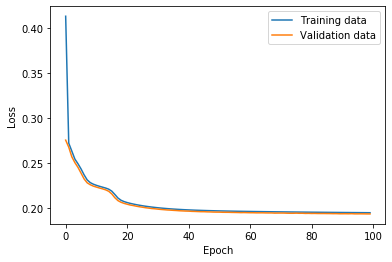

In [20]:
plot_loss(history)

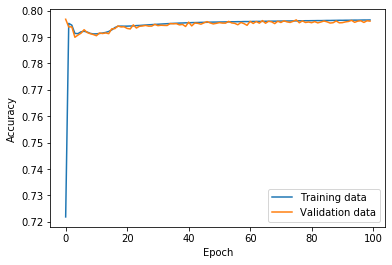

In [21]:
plot_acc(history)